# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Chougrani Sami

Part. 2: Paindaveine Gwenael 3504-2200

Part. 3: Van Raemdonck Thibault 3854-2000

Part. 4: Verrue Kyllian

Part. 5: Vienne Julien 2021-2200

Part. 6: Yusein Myumyun 3294-2200


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
from scipy.special import gammaln
from scipy.ndimage import variance
from scipy.stats import ranksums
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mae # -> pip install scikit-learn

In [5]:
# Ouverture des fichiers csv et conversion en dataframes
beijing = pd.read_csv('BeijingPM.csv')
shanghai = pd.read_csv('ShanghaiPM.csv')

# filter by date
beijing['date'] = pd.to_datetime(beijing[['year', 'month', 'day', 'hour']])
shanghai['date'] = pd.to_datetime(shanghai[['year', 'month', 'day', 'hour']])
start_date = '2012-01-01'
end_date = '2015-12-31'
beijing = beijing[(beijing['date'] >= start_date) & (beijing['date'] <= end_date)]
shanghai = shanghai[(shanghai['date'] >= start_date) & (shanghai['date'] <= end_date)] 

# merging the two dataframes
merge = pd.merge(beijing, shanghai, on=['No', 'year', 'month', 'day', 'hour', 'season'], how='inner')
merge = merge.dropna(subset=['PM_US Post_x', 'PM_US Post_y'])

# Split the data into winter and summer
winterPM = merge[merge['season'] == 4]
summerPM = merge[merge['season'] == 2]

b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [6]:
# stats for winter
Wstats = winterPM[['PM_US Post_x', 'PM_US Post_y']].describe(percentiles=[0.25,0.75]).loc[['mean','std','25%','75%']]
Wvar = np.var(winterPM['PM_US Post_x'].to_numpy())
Wvar1 = np.var(winterPM['PM_US Post_y'].to_numpy())
Wstats.loc['var'] = [Wvar, Wvar1]
Wstats = Wstats.rename(columns={'PM_US Post_x':'BeijingPM Winter', 'PM_US Post_y':'ShanghaiPM Winter'})

# stats for summer
Sstats = summerPM[['PM_US Post_x', 'PM_US Post_y']].describe(percentiles=[0.25,0.75]).loc[['mean','std','25%','75%']]
Svar = np.var(summerPM['PM_US Post_x'].to_numpy())
Svar1 = np.var(summerPM['PM_US Post_y'].to_numpy())
Sstats.loc['var'] = [Svar, Svar1]
Sstats = Sstats.rename(columns={'PM_US Post_x':'BeijingPM Summer', 'PM_US Post_y':'ShanghaiPM Summer'})

stats = pd.concat([Wstats, Sstats], axis=1)
stats.head()

,BeijingPM Winter,ShanghaiPM Winter,BeijingPM Summer,ShanghaiPM Summer
mean,122.543220,76.104722,71.840843,33.891807
std,125.003280,57.459412,54.573138,24.728152
25%,21.000000,36.000000,30.000000,16.000000
75%,181.000000,99.000000,100.000000,46.000000
var,15623.928277,3301.184312,2977.868525,611.407812


Comments here:

On remarque que Pekin a en moyenne une plus grande concentration et fluctuation de PM2.5 en hiver, compare a Shanghai.

On voit aussi que la concentration de PM2.5 a Shanghai l'ete est plus beaucoup plus faible que celle de Pekin qui correspond a la concentration de Shanghai mais en hiver.



-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



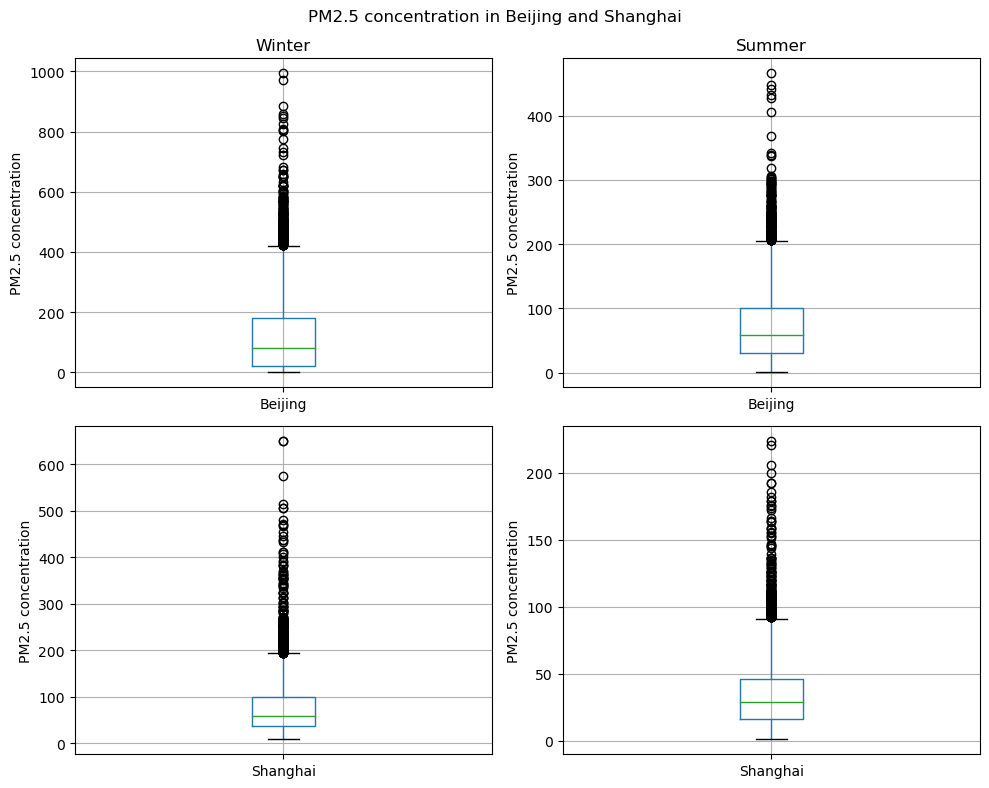

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot for winter
winterPM.boxplot(column=['PM_US Post_x'], ax=ax[0,0])
ax[0,0].set_title('Winter')
ax[0,0].set_ylabel('PM2.5 concentration')
ax[0,0].set_xticklabels(['Beijing'])

winterPM.boxplot(['PM_US Post_y'], ax=ax[1,0])
ax[1,0].set_ylabel('PM2.5 concentration')
ax[1,0].set_xticklabels(['Shanghai'])

# Boxplot for summer
summerPM.boxplot(column=['PM_US Post_x'], ax=ax[0,1])
ax[0,1].set_title('Summer')
ax[0,1].set_ylabel('PM2.5 concentration')
ax[0,1].set_xticklabels(['Beijing'])

summerPM.boxplot(column=['PM_US Post_y'], ax=ax[1,1])
ax[1,1].set_ylabel('PM2.5 concentration')
ax[1,1].set_xticklabels(['Shanghai'])

plt.suptitle('PM2.5 concentration in Beijing and Shanghai')
plt.tight_layout()
#plt.savefig("boxplot" + '.png', bbox_inches='tight')
plt.show()

Comments here:

La limite qui est conseillee par la comission europeenne est de 25 $\mu$*g*/$m^3$, or on voit que la moyenne pour tous les boxplots, sauf celui de Shanghai en ete, est bien au dessus de cette limite.

La moyenne de Shanghai en ete est proche de limite indiquee par la commission mais elle est tout de meme au superieur.

Pour Pekin, on observe que le maximum en hiver est deux fois plus grand que celui en ete. On remarque la meme chose pour Shanghai.

On en conclu que les emissions de PM2.5 sont plus elevees en hiver.

On remarque aussi qu'il y a beaucoup de outliers, ce qui pourrait signifier qu'il y a un grand nombre de jours avec un pollution extreme.


Source for the recommended level of PM2.5 : [air quality](https://environment.ec.europa.eu/topics/air/air-quality/eu-air-quality-standards_en)

## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [8]:
def log_likelihood_gamma(alpha, beta, data):
    n = len(data)  # Nombre d'observations
    ll = n * (alpha * np.log(beta) - gammaln(alpha)) + (alpha - 1) * np.sum(np.log(data)) - beta * np.sum(data)
    return ll

dataWinterBeijing = winterPM['PM_US Post_x'].values
dataWinterShanghai = winterPM['PM_US Post_y'].values
dataSummerBeijing = summerPM['PM_US Post_x'].values
dataSummerShanghai = summerPM['PM_US Post_y'].values

alpha1, loc1, theta1 = sc.gamma.fit(dataWinterBeijing, floc=0)
beta1 = 1 / theta1
ll1 = log_likelihood_gamma(alpha1, beta1, dataWinterBeijing)
alpha2, loc2, theta2 = sc.gamma.fit(dataWinterShanghai, floc=0)
beta2 = 1 / theta2
ll2 = log_likelihood_gamma(alpha2, beta2, dataWinterShanghai)
alpha3, loc3, theta3 = sc.gamma.fit(dataSummerBeijing, floc=0)
beta3 = 1 / theta3
ll3 = log_likelihood_gamma(alpha3, beta3, dataSummerBeijing)
alpha4, loc4, theta4 = sc.gamma.fit(dataSummerShanghai, floc=0)
beta4 = 1 / theta4
ll4 = log_likelihood_gamma(alpha4, beta4, dataSummerShanghai)

#print(ll1,'\n',ll2,'\n',ll3,'\n',ll4)

b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

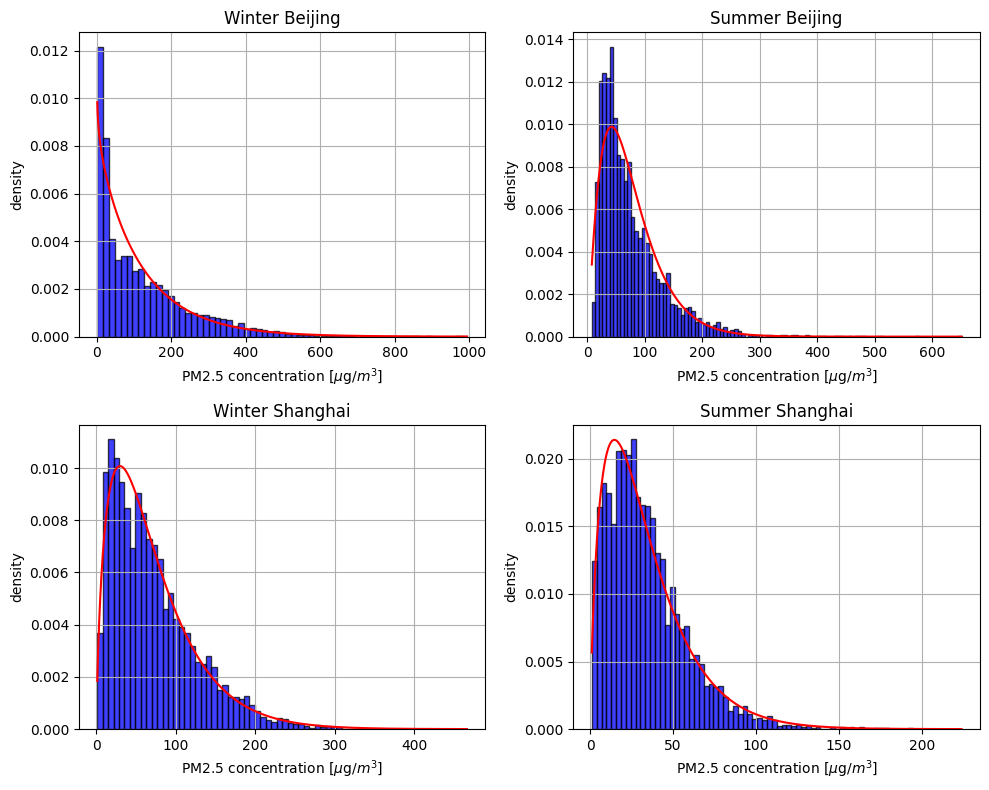

In [9]:
# Code here
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms
winterPM.hist(column=['PM_US Post_x'], ax=ax[0,0], density=True, bins='auto', facecolor='blue', alpha=0.75, edgecolor='black')
winterPM.hist(column=['PM_US Post_y'], ax=ax[0,1], density=True, bins='auto', facecolor='blue', alpha=0.75, edgecolor='black')
summerPM.hist(column=['PM_US Post_x'], ax=ax[1,0], density=True, bins='auto', facecolor='blue', alpha=0.75, edgecolor='black')
summerPM.hist(column=['PM_US Post_y'], ax=ax[1,1], density=True, bins='auto', facecolor='blue', alpha=0.75, edgecolor='black')

# Plot the fitted gamma pdf
xwb = np.linspace(min(dataWinterBeijing), max(dataWinterBeijing), 1000)
xws = np.linspace(min(dataWinterShanghai), max(dataWinterShanghai), 1000)
xsb = np.linspace(min(dataSummerBeijing), max(dataSummerBeijing), 1000)
xss = np.linspace(min(dataSummerShanghai), max(dataSummerShanghai), 1000)

ax[0,0].plot(xwb, sc.gamma.pdf(xwb, alpha1, loc1, theta1), '-r')
ax[0,1].plot(xws, sc.gamma.pdf(xws, alpha2, loc2, theta2), '-r')
ax[1,0].plot(xsb, sc.gamma.pdf(xsb, alpha3, loc3, theta3), '-r')
ax[1,1].plot(xss, sc.gamma.pdf(xss, alpha4, loc4, theta4), '-r')

# Set some titles and labels
ax[0,0].set(title="Winter Beijing", xlabel=r"PM2.5 concentration [$\mu\text{g}/m^3$]", ylabel="density")
ax[0,1].set(title="Summer Beijing", xlabel=r"PM2.5 concentration [$\mu\text{g}/m^3$]", ylabel="density")
ax[1,0].set(title="Winter Shanghai", xlabel=r"PM2.5 concentration [$\mu\text{g}/m^3$]", ylabel="density")
ax[1,1].set(title="Summer Shanghai", xlabel=r"PM2.5 concentration [$\mu\text{g}/m^3$]", ylabel="density")

plt.tight_layout()
plt.show()

Comments here:

En general, on remarque que les distributions s'ajuste bien a nos donnees.


------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

In [10]:
# Mean and standard deviation of the gamme distribution

def compute_mean_std(alpha, theta):
    mean = alpha * theta
    std = np.sqrt(alpha) * theta
    p25 = sc.gamma.ppf(0.25, alpha, scale=theta)
    p50 = sc.gamma.ppf(0.50, alpha, scale=theta)
    p75 = sc.gamma.ppf(0.75, alpha, scale=theta)
    return mean, std, p25, p50, p75

mean1, std1, p251, p501, p751 = compute_mean_std(alpha1, theta1)
mean2, std2, p252, p502, p752 = compute_mean_std(alpha2, theta2)
mean3, std3, p253, p503, p753 = compute_mean_std(alpha3, theta3)
mean4, std4, p254, p504, p754 = compute_mean_std(alpha4, theta4)

results = pd.DataFrame({'mean': [mean1, mean2, mean3, mean4], 
                        'std': [std1, std2, std3, std4],
                        '25%': [p251, p252, p253, p254],
                        '50%': [p501, p502, p503, p504],
                        '75%': [p751, p752, p753, p754]},
                        index=['Winter Beijing', 'Winter Shanghai', 'Summer Beijing', 'Summer Shanghai'])

print("Empirical statistics:\n", stats)
results.head()




Empirical statistics:
       BeijingPM Winter  ShanghaiPM Winter  BeijingPM Summer  ShanghaiPM Summer
mean        122.543220          76.104722         71.840843          33.891807
std         125.003280          57.459412         54.573138          24.728152
25%          21.000000          36.000000         30.000000          16.000000
75%         181.000000          99.000000        100.000000          46.000000
var       15623.928277        3301.184312       2977.868525         611.407812


,mean,std,25%,50%,75%
Winter Beijing,122.543220,126.429858,33.013707,82.788035,169.890260
Winter Shanghai,76.104722,50.722919,38.813502,65.180934,101.624380
Summer Beijing,71.840843,55.086481,31.494866,58.356072,97.712423
Summer Shanghai,33.891807,25.556030,15.160290,27.729424,46.005220


Comments here:

les valeurs obtenues par la distributuin gamma semblent être en accord avec les statistiques empiriques ce qui prouve que la gamma est un bon modèle pour calculer les émissions de PM2.5

------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

Confidence interval for alpha: [0.917634   0.96197234]
Confidence interval for theta: [126.17423093 134.45250112]


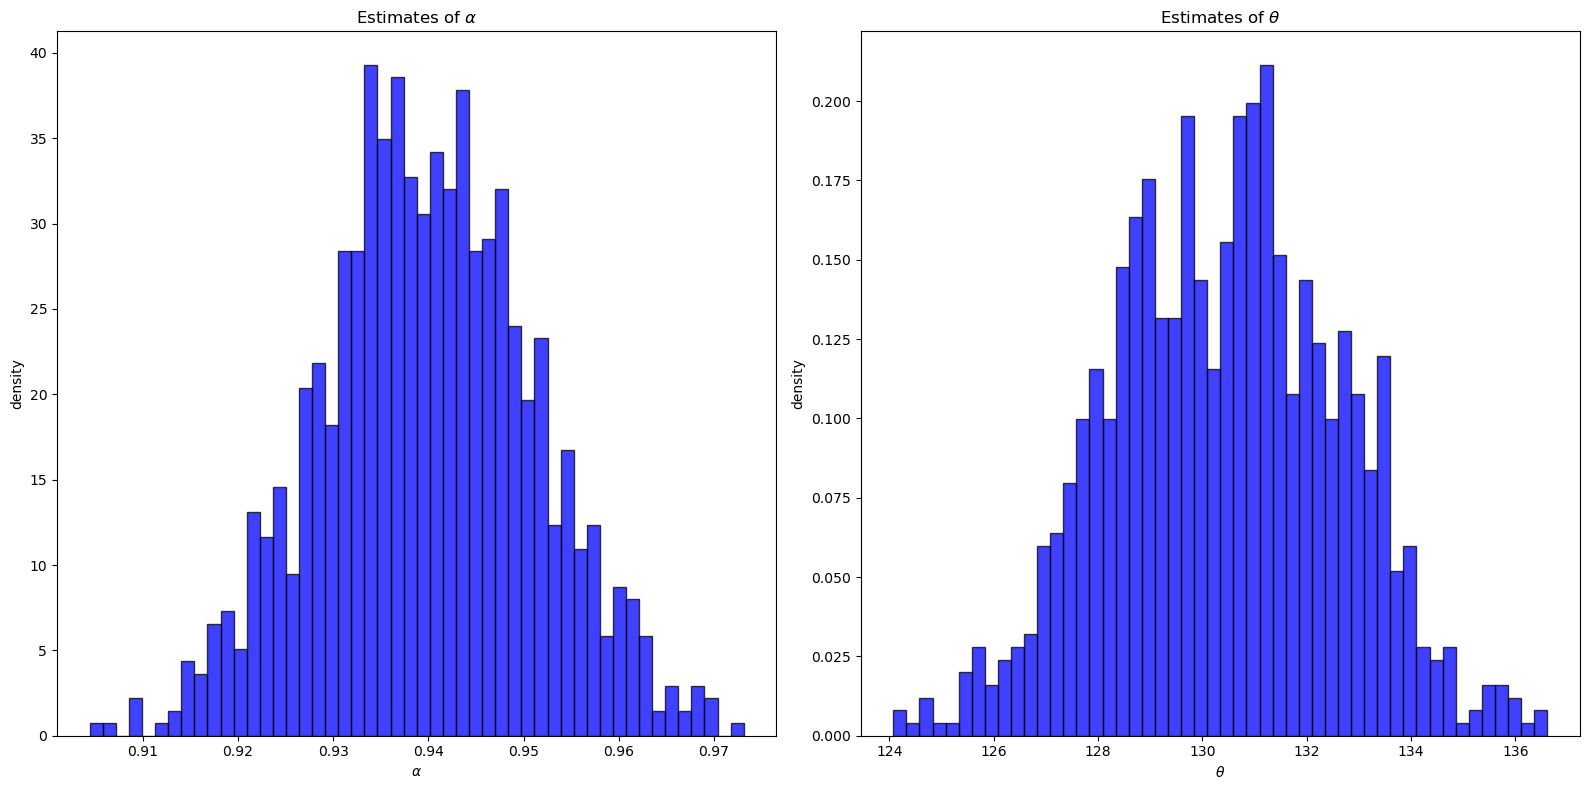

In [11]:
# Bootstrap
M=1000
n=6000
alpha_estimates = []
scale_estimates = []

for _ in range(M):
    sample = np.random.choice(dataWinterBeijing, size=n, replace=True)
    alpha, loc, theta = sc.gamma.fit(sample, floc=0)
    alpha_estimates.append(alpha)
    scale_estimates.append(theta)

# Plot the histograms of the estimates

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(alpha_estimates,  50, density=1, facecolor='blue', alpha=0.75, edgecolor='black')
ax[0].set_title(r'Estimates of $\alpha$')
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel('density')

ax[1].hist(scale_estimates, 50, density=1, facecolor='blue', alpha=0.75, edgecolor='black')
ax[1].set_title(r'Estimates of $\theta$')
ax[1].set_xlabel(r'$\theta$')
ax[1].set_ylabel('density')

# Compute the confidence intervals

alpha_ci = np.percentile(alpha_estimates, [2.5, 97.5])
theta_ci = np.percentile(scale_estimates, [2.5, 97.5])

print("Confidence interval for alpha:", alpha_ci)
print("Confidence interval for theta:", theta_ci)

plt.tight_layout()
#plt.savefig("bootstrap" + '.png', bbox_inches='tight')
plt.show()





Comments here:

a partir des graphique on peut voir que les estimations semblent stable (forme de distribution normale).

## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [12]:
# Filter the data
Wbeijing = beijing[beijing['season'] == 4].dropna(subset=['PM_US Post', 'DEWP', 'TEMP', 'HUMI', 'PRES', 'Iws', 'precipitation', 'cbwd'])

# Create dummy for the cbwd variable
Wbeijing = pd.get_dummies(Wbeijing, columns=['cbwd'], drop_first=True, dtype=int)

# Exploratory variables
X = Wbeijing[['DEWP', 'TEMP', 'HUMI', 'PRES', 'Iws', 'precipitation', 'cbwd_cv', 'cbwd_NW', 'cbwd_SE']]

# Y response variable
Y = Wbeijing['PM_US Post']

# Add a constant
Xm = sm.add_constant(X)

# Fit the model by least square minimization
results = sm.OLS(Y, Xm).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             PM_US Post   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     820.7
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:25:12   Log-Likelihood:                -48851.
No. Observations:                8239   AIC:                         9.772e+04
Df Residuals:                    8229   BIC:                         9.779e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2454.6189    205.426     11.949

Comments here:

le $R²$ indique que notre modèle n'est pas précis mais qu'il parvient quand même une partie des variations.

On peut voir que les conditions météorologiques a un impact sur le niveau de PM2.5 (surtout les précipitations qui diminue le taux de PM2.5)


------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

In [13]:
# a
beijing_training = beijing.iloc[:int(0.75 * len(beijing))].copy() # on slipt a 75 et 25%
beijing_validation = beijing.iloc[int(0.75*len(beijing)):].copy()

beijing_training['Et-1'] = beijing_training['PM_US Post'].shift(1) # création des E(t-1), E(t-2) et E(t-3)
beijing_training['Et-2'] = beijing_training['PM_US Post'].shift(2)
beijing_training['Et-3'] = beijing_training['PM_US Post'].shift(3)

# sans le drop de PM_US Post j'avais que des Nan donc je l'ai ajouté mais a vérifier si c'est bon ou pas
beijing_training = beijing_training.dropna(subset=['Et-1', 'Et-2', 'Et-3','PM_US Post']) # on supprime les Nan


# b
Xm = sm.add_constant(beijing_training[['Et-1', 'Et-2', 'Et-3']]) # ajout de la constante (code prof)
results = sm.OLS(beijing_training['PM_US Post'],Xm).fit()
print(results.summary()) 

# c

                            OLS Regression Results                            
Dep. Variable:             PM_US Post   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.273e+05
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:25:16   Log-Likelihood:            -1.1473e+05
No. Observations:               25241   AIC:                         2.295e+05
Df Residuals:                   25237   BIC:                         2.295e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7098      0.211     17.576      0.0

Comments here:

le modèle est bien ajusté car $R²$ a une valeur de 0.938 et donc plus la valeur est élevée plus notre modèle est bien ajusté.

le faite que F-stat est élevé et que la p-valeur est a 0 indique que les variables décalées influencent les émissions de PM2.5 actuelles.

Parmis les 3 décalage ont peu voir que celui qui est le meilleur pour prédire la valeur actuelle est celui de Et-1 (grace au coef)

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

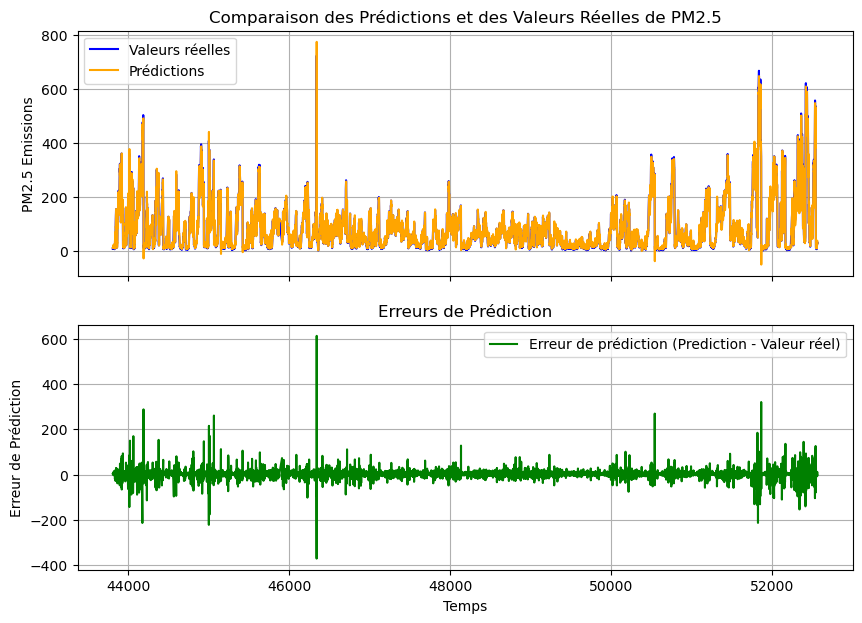

MAE sur l'ensemble d'entrainement : 12.179015669321311 et celle sur l'ensemeble de test : 10.656122775912603
Erreur moyenne : 82.56555933795046 et écart-type : 88.27282007993047
pourcentage : 12.906256387479736


In [ ]:
# Code here
beijing_validation['Et-1'] = beijing_validation['PM_US Post'].shift(1) # création des E(t-1), E(t-2) et E(t-3)
beijing_validation['Et-2'] = beijing_validation['PM_US Post'].shift(2)
beijing_validation['Et-3'] = beijing_validation['PM_US Post'].shift(3)

# sans le drop de PM_US Post j'avais que des Nan donc je l'ai ajouté mais a vérifier si c'est bon ou pas
beijing_validation = beijing_validation.dropna(subset=['Et-1', 'Et-2', 'Et-3','PM_US Post']) # on supprime les Nan

X_prime = sm.add_constant(beijing_validation[['Et-1', 'Et-2', 'Et-3']]) # ajout de la constante (code prof)

y_hat = results.predict(X_prime) 


erreurs = y_hat - beijing_validation['PM_US Post']


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

# Premier graphique : Prédictions vs Valeurs réelles
ax1.plot(beijing_validation.index, beijing_validation['PM_US Post'], label='Valeurs réelles', color='blue')
ax1.plot(beijing_validation.index, y_hat, label='Prédictions', color='orange')
ax1.set_ylabel('PM2.5 Emissions')
ax1.set_title('Comparaison des Prédictions et des Valeurs Réelles de PM2.5')
ax1.legend()
ax1.grid(True)

# Deuxième graphique : Erreurs de prédiction
ax2.plot(beijing_validation.index, erreurs, label='Erreur de prédiction (Prediction - Valeur réel)', color='green')
ax2.set_xlabel('Temps')
ax2.set_ylabel('Erreur de Prédiction')
ax2.set_title('Erreurs de Prédiction')
ax2.legend()
ax2.grid(True)

plt.show()

MAE_training = mae(beijing_training['PM_US Post'], results.predict(Xm))
MAE_test = mae(beijing_validation['PM_US Post'], y_hat)

print(f"MAE sur l'ensemble d'entrainement : {MAE_training} et celle sur l'ensemeble de test : {MAE_test}")


print(f"Erreur moyenne : {beijing_validation['PM_US Post'].mean()} et écart-type : {beijing_validation['PM_US Post'].std()}")
print(f"pourcentage de la moyenne : {MAE_test/beijing_validation['PM_US Post'].mean()*100}")

Comments here:

on peut voir que notre modèle est efficace et est précis lorsque les valeurs réelles semble stable sans forte variation. Cependant les prédictions semblent moins préciese lors de forte variation.

On peut y voir également un pic qui prouve qu'une variation "extreme" peut etre difficile a prédire (cf erreurs de prédiction).

Pour ce qui est des erreurs, elles sembles toujours être proche de 0 sauf pour des grandes variation où elles sont un peu plus élevées. 

Etant donné que le MAE est beaucoup plus petit que l'écart type on peut donc dire que les erreurs sont acceptable.
EN comparant également avec le pourcentage de la moeynne, on se rend compte que celui ci est acceptable et donc on parvient bien à des prédictions précises.



## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

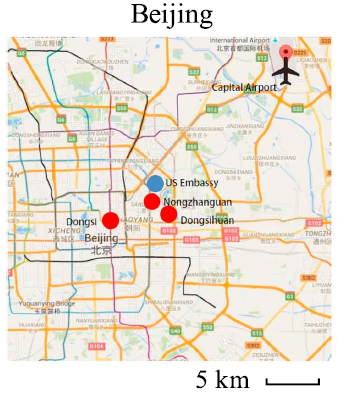


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [18]:
# Filter the data
WNbeijing = beijing[beijing['season'] == 4].dropna(subset=['PM_US Post', 'PM_Nongzhanguan'])

b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [19]:
# Filter the data
nong = WNbeijing['PM_Nongzhanguan']
us = WNbeijing['PM_US Post']

# Perform the Student's t-test
t_stat, p_value = sc.ttest_ind(nong, us)
alpha=0.05
print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value < alpha:
    print("On rejecte l'hypothese nulle")
else:
    print("On a pas assez de preuve pour rejeter l'hypothese nulle")

t-statistic: -3.660852158366761
p-value: 0.00025249513261972465
On rejecte l'hypothese nulle


Comment here:

puisque la p-value est plus petite que 0.05 on rejete donc l'hypothèse nulle


c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

Comment here:

puisqu'on peut avoir des valeurs extrême c'est mieux que la student qui a besoind d'avoir une distribution normale

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [21]:
wilcoxon_stat, wilcoxon_p_value = ranksums(nong, us)

print("Wilcoxon statistic:", wilcoxon_stat)
print("Wilcoxon p-value:", wilcoxon_p_value)

if wilcoxon_p_value < alpha:
    print("On rejecte l'hypothese nulle")
else:
    print("On a pas assez de preuve pour rejeter l'hypothese nulle")


Wilcoxon statistic: -3.9630941802395374
Wilcoxon p-value: 7.398457779775879e-05
On rejecte l'hypothese nulle


Comment here:

on peut voir que la p-value obtenue par la distribution de wilcoxon est encore plus faible que la student et donc ca confirme une différence de PM2.5 entre les 2 ambassades.
On peut également comprendre que les données ne suivent pas une distribution normale.

on rejete donc l'hypothèse nul